# E-commerce Customer Behavior Dataset

[Link to Dataset](https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset)

## Columns

| Column Name              | Type                      | Description                                                                                           |
|--------------------------|---------------------------|-------------------------------------------------------------------------------------------------------|
| Customer ID              | Numeric                   | A unique identifier assigned to each customer, ensuring distinction across the dataset.                |
| Gender                   | Categorical (Male, Female)| Specifies the gender of the customer, allowing for gender-based analytics.                              |
| Age                      | Numeric                   | Represents the age of the customer, enabling age-group-specific insights.                                |
| City                     | Categorical (City names)  | Indicates the city of residence for each customer, providing geographic insights.                        |
| Membership Type          | Categorical (Gold, Silver, Bronze) | Identifies the type of membership held by the customer, influencing perks and benefits.          |
| Total Spend              | Numeric                   | Records the total monetary expenditure by the customer on the e-commerce platform.                      |
| Items Purchased          | Numeric                   | Quantifies the total number of items purchased by the customer.                                          |
| Average Rating           | Numeric (0 to 5, with decimals) | Represents the average rating given by the customer for purchased items, gauging satisfaction.     |
| Discount Applied         | Boolean (True, False)     | Indicates whether a discount was applied to the customer's purchase, influencing buying behavior.     |
| Days Since Last Purchase | Numeric                   | Reflects the number of days elapsed since the customer's most recent purchase, aiding in retention analysis. |
| Satisfaction Level       | Categorical (Satisfied, Neutral, Unsatisfied) | Captures the overall satisfaction level of the customer, providing a subjective measure of their experience. |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Analiza dataset-a

In [3]:
df = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [4]:
df.head(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


In [5]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [7]:
df.drop(['Customer ID'], axis=1, inplace=True)

In [8]:
df[df.isna().any(axis=1)]

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


### Impute missing values

In [9]:
df['Satisfaction Level'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Satisfaction Level']]).squeeze()

In [10]:
df.iloc[[71,143]]

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,Female,37,Houston,Bronze,420.8,7,3.1,False,21,Satisfied
143,Female,37,Houston,Bronze,430.8,7,3.4,False,23,Satisfied


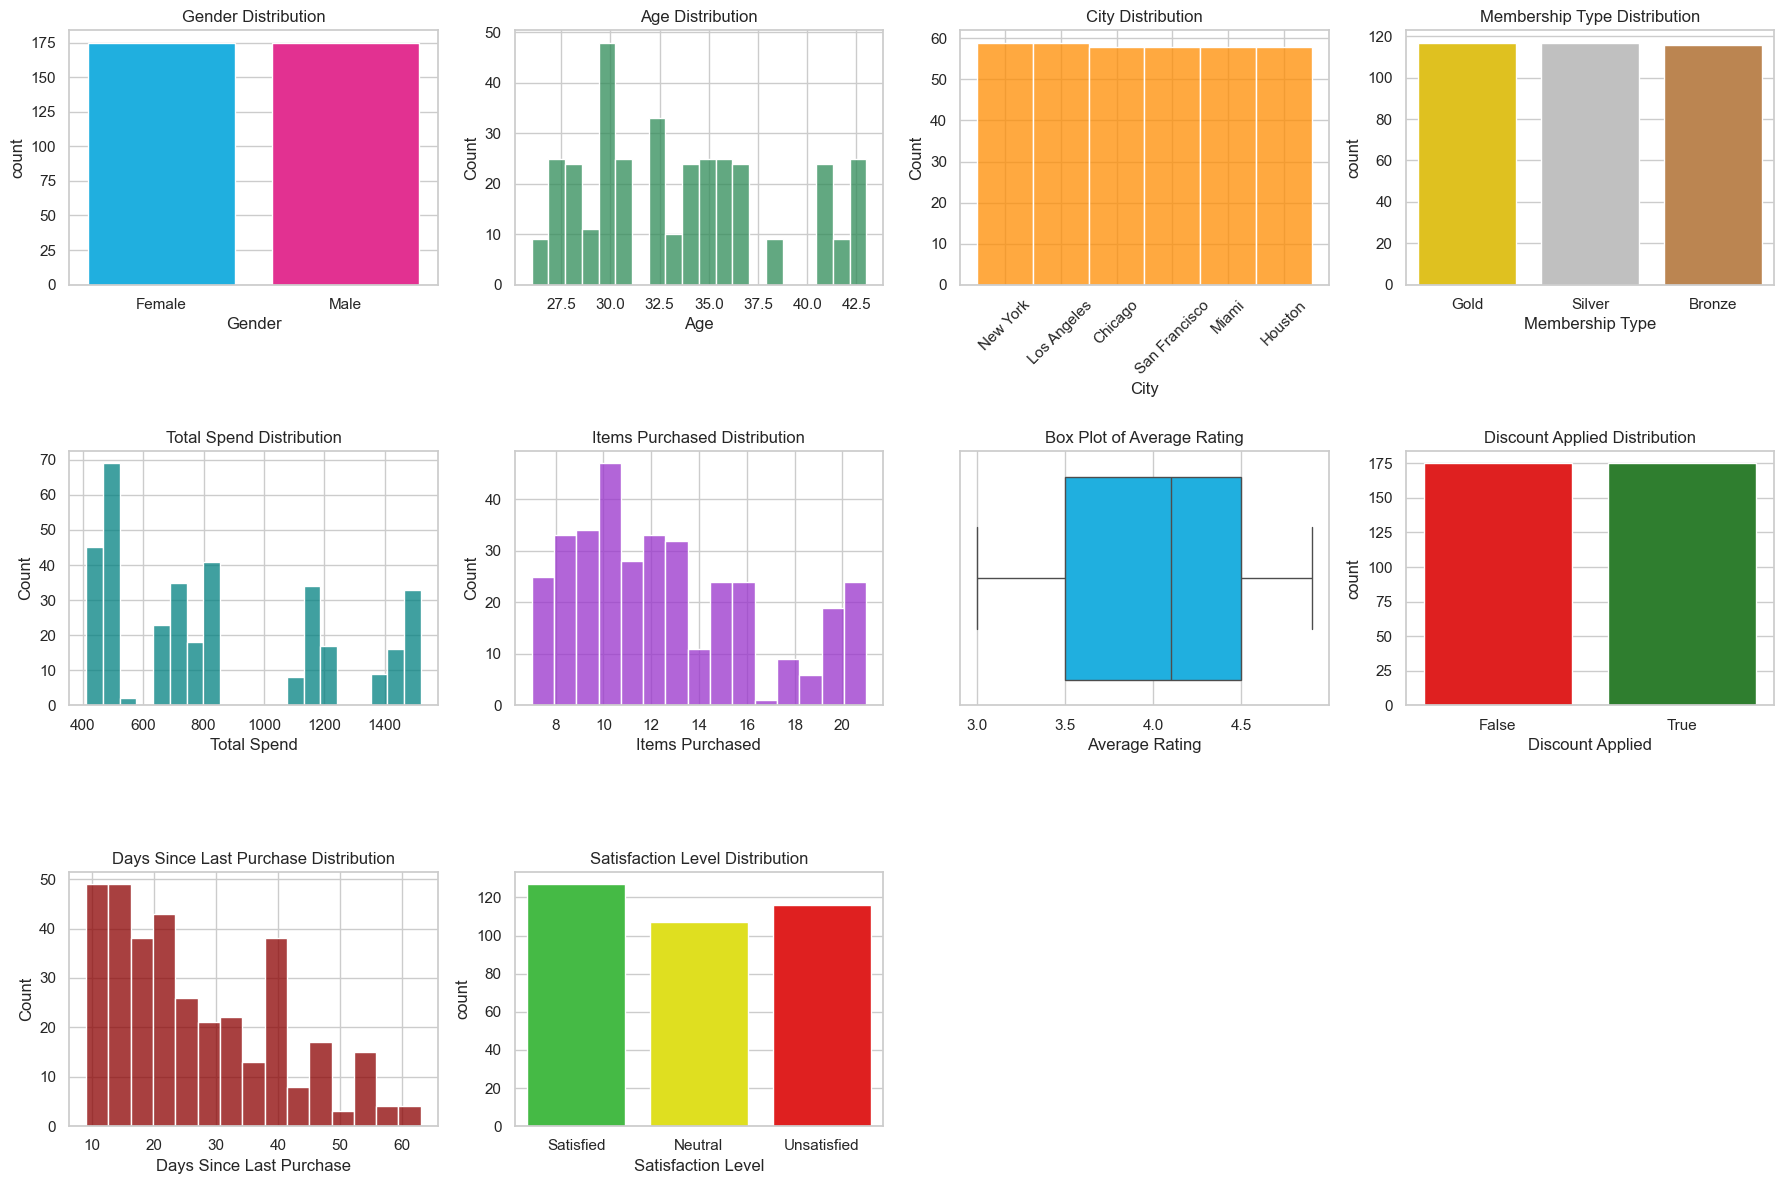

In [27]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

sns.countplot(x='Gender', data=df, palette={'Male': 'deeppink', 'Female': 'deepskyblue'}, ax=axes[0, 0], legend=False, hue='Gender')
axes[0, 0].set_title('Gender Distribution')

sns.histplot(df['Age'], bins=20, color='seagreen', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')

sns.histplot(df['City'], bins=20, color='darkorange', ax=axes[0, 2])
axes[0, 2].set_title('City Distribution')
axes[0, 2].tick_params(axis='x', rotation=45)

sns.countplot(x='Membership Type', data=df, palette=('gold', 'silver', 'peru'), ax=axes[0, 3], legend=False, hue='Membership Type')
axes[0, 3].set_title('Membership Type Distribution')

sns.histplot(df['Total Spend'], bins=20, color='teal', ax=axes[1, 0])
axes[1, 0].set_title('Total Spend Distribution')

sns.histplot(df['Items Purchased'], bins=15, color='darkorchid', ax=axes[1, 1])
axes[1, 1].set_title('Items Purchased Distribution')

sns.boxplot(x='Average Rating', data=df, color='deepskyblue', ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of Average Rating')

sns.countplot(x='Discount Applied', data=df, palette=('red', 'forestgreen'), ax=axes[1, 3], legend=False, hue='Discount Applied')
axes[1, 3].set_title('Discount Applied Distribution')

sns.histplot(df['Days Since Last Purchase'], bins=15, color='darkred', ax=axes[2, 0])
axes[2, 0].set_title('Days Since Last Purchase Distribution')

sns.countplot(x='Satisfaction Level', data=df, palette=('limegreen', 'yellow', 'red'), ax=axes[2, 1], hue='Satisfaction Level', legend=False)
axes[2, 1].set_title('Satisfaction Level Distribution')

plt.tight_layout(h_pad=2.0)
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'City', 'Membership Type'])
df_encoded['Discount Applied'] = df_encoded['Discount Applied'].astype(int)